# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Analyze trends in SAT & ACT scores from 2017 - 2018 and make recommendations to increase SAT participation.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.style.use('ggplot')

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
data_sat_2017 = pd.read_csv(r'..\data\sat_2017.csv') #importing SAT 2017 dataset
df_sat_2017 = pd.DataFrame(data_sat_2017)

data_act_2017 = pd.read_csv(r'..\data\act_2017.csv')#importing ACT 2017 dataset
df_act_2017 = pd.DataFrame(data_act_2017)

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
df_sat_2017.head(10) #check the dataframe

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
df_act_2017.head(10) #check the dataframe

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: The data shows the participation and mean scores for the SAT and ACT test in the USA.

#### 4a. Does the data look complete? 

In [5]:
print(len(df_sat_2017)) #check the length of the data
print(len(df_act_2017))

51
52


In [6]:
df_sat_2017.info() #check the datatype 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [7]:
df_act_2017.info() #check the datatype 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [8]:
df_sat_2017_state = df_sat_2017['State'] #check to see what is the difference between the data set
df_act_2017_state = df_act_2017['State']
df_difference_state_2017 = pd.concat([df_sat_2017_state, df_act_2017_state])
df_difference_state_2017 = df_difference_state_2017.reset_index(drop=True)

In [9]:
df_state_2017 = df_difference_state_2017.groupby(list(df_difference_state_2017))
idx = [x[0] for x in df_state_2017.groups.values() if len(x) == 1]

In [10]:
df_difference_state_2017.reindex(idx)

51    National
Name: State, dtype: object

Answer:
Yes, there appear to have no empty fields and there are 50 states in USA. The only difference is ACT dataset indicated National data whereas SAT data only listed the states.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:

The minimum SAT score is 0. The maximum SAT score is 800 for each of the two tested categories, which totals 1600. The minimum ACT score for each category is 1. The maximum ACT score for each category is 36.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [11]:
round(df_sat_2017.describe(),2) #look for error in data set

,Evidence-Based Reading and Writing,Math,Total
count,51.00,51.00,51.00
mean,569.12,547.63,1126.10
std,45.67,84.91,92.49
min,482.00,52.00,950.00
25%,533.50,522.00,1055.50
50%,559.00,548.00,1107.00
75%,613.00,599.00,1212.00
max,644.00,651.00,1295.00


In [12]:
df_sat_2017[df_sat_2017['Math'] < 500] #Maryland math score is too low to be true

,State,Participation,Evidence-Based Reading and Writing,Math,Total
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017
12,Idaho,93%,513,493,1005
19,Maine,95%,513,499,1012
20,Maryland,69%,536,52,1060
22,Michigan,100%,509,495,1005


In [13]:
df_sat_2017['Math'].replace({52: 524}, inplace=True) #replacing wrong data
df_sat_2017[df_sat_2017['State'] == 'Maryland']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


In [14]:
round(df_act_2017.describe(),2) #checking data set

,English,Math,Reading,Science
count,52.00,52.00,52.00,52.00
mean,20.92,21.17,22.00,21.04
std,2.33,1.96,2.05,3.15
min,16.30,18.00,18.10,2.30
25%,19.00,19.40,20.48,19.90
50%,20.55,20.90,21.70,21.15
75%,23.30,23.10,24.13,22.52
max,25.50,25.30,26.00,24.90


In [15]:
df_act_2017[df_act_2017['Science'] < 20] #lowest science score is too low to be true

,State,Participation,English,Math,Reading,Science,Composite
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
10,Florida,73%,19.0,19.4,21.0,19.4,19.8
12,Hawaii,90%,17.8,19.2,19.2,19.3,19.0
19,Louisiana,100%,19.4,18.8,19.8,19.6,19.5
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6
25,Mississippi,100%,18.2,18.1,18.8,18.8,18.6
29,Nevada,100%,16.3,18.0,18.1,18.2,17.8


In [16]:
df_act_2017['Science'].replace({2.3: 23.2}, inplace=True) #changing wrong data
df_act_2017[df_act_2017['State'] == 'Maryland']

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,23.2,23.6


In [17]:
df_act_2017['Composite'].value_counts(normalize=True) # check why composite is an object and not float

21.4     0.057692
20.3     0.057692
19.8     0.057692
24.2     0.038462
21.8     0.038462
19.7     0.038462
20.4     0.038462
19.4     0.038462
23.6     0.038462
21.9     0.038462
24.1     0.038462
19.2     0.019231
18.7     0.019231
23.8     0.019231
17.8     0.019231
20.2x    0.019231
25.4     0.019231
21.0     0.019231
25.5     0.019231
20.5     0.019231
23.7     0.019231
21.5     0.019231
22.6     0.019231
22.8     0.019231
24.0     0.019231
20.8     0.019231
23.9     0.019231
24.3     0.019231
25.2     0.019231
20.7     0.019231
18.6     0.019231
19.1     0.019231
21.7     0.019231
20.0     0.019231
22.0     0.019231
22.3     0.019231
19.5     0.019231
19.0     0.019231
Name: Composite, dtype: float64

In [18]:
df_act_2017[df_act_2017['Composite'] == '20.2x'] #changing error in data

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


In [19]:
df_act_2017['Composite'].replace({'20.2x': 20.2}, inplace=True)

In [20]:
df_act_2017[df_act_2017['State'] == 'Wyoming'] #checking changes made to data

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2


#### 5. What are your data types? 
Display the data types of each feature. 

In [21]:
df_sat_2017.dtypes #checking data type

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [22]:
df_act_2017.dtypes  #checking data type

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: 

Participation is currently considered an object due to the % symbol, it will be better if it is a float. 
ACT Composite data is an object, it should be a float.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [23]:
#code
def convert_participation(x): #changing data type of participation
    x = x.strip('%') #removing '%' symbol
    x = float(x) #change value to float
    return x

- Fix any individual values preventing other columns from being the appropriate type.

In [24]:
#code
df_sat_2017['Participation'] = df_sat_2017['Participation'].map(convert_participation) #removing '%' from values
df_act_2017['Participation'] = df_act_2017['Participation'].map(convert_participation)

In [25]:
#convert object to float
df_act_2017['Composite'] = df_act_2017['Composite'].apply(pd.to_numeric)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [26]:
df_sat_2017.head(5) #checking the data

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [27]:
df_act_2017.head(5) #checking the data

,State,Participation,English,Math,Reading,Science,Composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


- Display the data types again to confirm they are correct.

In [28]:
#Code:
df_sat_2017.dtypes #checking the data types

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [29]:
df_act_2017.dtypes #checking the data types

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [30]:
#code
sat17 = df_sat_2017.rename(columns=lambda t:'sat17_' + t.lower()) #changing name with lambda function
sat17.head()

,sat17_state,sat17_participation,sat17_evidence-based reading and writing,sat17_math,sat17_total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [31]:
act17 = df_act_2017.rename(columns=lambda t:'act17_' + t.lower()) #changing name with lambda function
act17.head()

,act17_state,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|sat17_state|object|SAT|name of state|
|sat17_participation|float|SAT|SAT % of participant in 2017| 
|sat17_evidence-based reading and writing|float|SAT|average SAT ERW Score| 
|sat17_math|float|SAT|average SAT Math Score| 
|sat17_total|float|SAT|average SAT Total Score| 
|act17_state|object|ACT|name of state| 
|act17_participation|float|ACT|ACT % of participant in 2017| 
|act17_english|float|ACT|average SAT English Score| 
|act17_math|float|ACT|average SAT Math Score|
|act17_reading|float|ACT|average SAT Reading Score|
|act17_science|float|ACT|average SAT Science Score|
|act17_composite|float|ACT|average SAT Composite Score|







#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [32]:
act17 = act17.drop(0) #removing national row from ACT dataset

In [33]:
act17.head()

,act17_state,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [34]:
#Code:
sat17.rename(columns={'sat17_state': 'state'}, inplace=True) #renaming states column for both dataset to be same, in order to merge
act17.rename(columns={'act17_state': 'state'}, inplace=True)
df_2017 = pd.merge(sat17, act17, on= 'state')

In [35]:
df_2017.head()

,state,sat17_participation,sat17_evidence-based reading and writing,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [36]:
#code:
export_path = r'..\data\combined_2017.csv' #exporting data to CSV
df_2017.to_csv(export_path)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

**1. Import Data**

In [37]:
data_sat_2018 = pd.read_csv(r'..\data\sat_2018.csv') #exporting data to CSV
df_sat_2018 = pd.DataFrame(data_sat_2018)

data_act_2018 = pd.read_csv(r'..\data\act_2018_updated.csv') #exporting data to CSV
df_act_2018 = pd.DataFrame(data_act_2018)

**2.Display data**

[SAT suite result 2018](https://reports.collegeboard.org/archive/sat-suite-program-results/2018/state-results).

In [38]:
df_sat_2018.head() #to see if the columns have the information expected

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


[ACT result 2018](http://www.act.org/content/dam/act/unsecured/documents/cccr2018/Average-Scores-by-State.pdf).
*note Individual subject scores not found

In [39]:
df_act_2018.head() #to see if the columns have the information expected

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


**3. Fixing error**

In [40]:
print(len(df_sat_2018)) # checking the length of data to ensure its the same
print(len(df_act_2018))

51
51


In [41]:
#correcting error found in SAT scores
states_w_sat_error_2018 = ['Florida', 'Hawaii', 'Indiana', 'South Dakota', 'Utah']

required_sat = df_sat_2018[df_sat_2018['State'].isin(states_w_sat_error_2018)]
required_sat

,State,Participation,Evidence-Based Reading and Writing,Math,Total
9,Florida,56%,550,549,1099
11,Hawaii,56%,480,530,1010
14,Indiana,63%,542,532,1074
41,South Dakota,3%,622,618,1240
44,Utah,4%,480,530,1010


In [42]:
# changing all error found
df_sat_2018.loc[9, 'Participation'] = '97%'
df_sat_2018.loc[9, 'Evidence-Based Reading and Writing'] = 522
df_sat_2018.loc[9, 'Math'] = 493
df_sat_2018.loc[9, 'Total'] = 1014

df_sat_2018.loc[11, 'Evidence-Based Reading and Writing'] = 550
df_sat_2018.loc[11, 'Math'] = 549
df_sat_2018.loc[11, 'Total'] = 1099

df_sat_2018.loc[14, 'Participation'] = '67%'
df_sat_2018.loc[14, 'Evidence-Based Reading and Writing'] = 546
df_sat_2018.loc[14, 'Math'] = 539
df_sat_2018.loc[14, 'Total'] = 1086

df_sat_2018.loc[41, 'Total'] = 1241

df_sat_2018.loc[44, 'Evidence-Based Reading and Writing'] = 618
df_sat_2018.loc[44, 'Math'] = 612
df_sat_2018.loc[44, 'Total'] = 1230

In [43]:
states_w_sat_error_2018 = ['Florida', 'Hawaii', 'Indiana', 'South Dakota', 'Utah'] #checking changed data

required_sat = df_sat_2018[df_sat_2018['State'].isin(states_w_sat_error_2018)]
required_sat

,State,Participation,Evidence-Based Reading and Writing,Math,Total
9,Florida,97%,522,493,1014
11,Hawaii,56%,550,549,1099
14,Indiana,67%,546,539,1086
41,South Dakota,3%,622,618,1241
44,Utah,4%,618,612,1230


In [44]:
##correcting error found in ACT scores
states_w_act_error_2018 = ['Michigan', 'South Dakota', 'Delaware']

required_sat = df_act_2018[df_act_2018['State'].isin(states_w_act_error_2018)]
round(required_sat, 2)

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
7,Delaware,17,23.2,23.7,23.1,24.5,23.4
22,Michigan,22,24.4,24.5,23.9,24.7,23.9
41,South Dakota,77,21.9,20.8,21.6,22.4,22.2


In [45]:
#changing all error data
df_act_2018.loc[22, 'Average Composite Score'] = 22

df_act_2018.loc[41, 'Average Composite Score'] = 20.6

df_act_2018.loc[7, 'Average Composite Score'] = 23.8


In [46]:
states_w_act_error_2018 = ['Michigan', 'South Dakota', 'Delaware']# checking changed data

required_sat = df_act_2018[df_act_2018['State'].isin(states_w_act_error_2018)]
round(required_sat, 2)

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
7,Delaware,17,23.8,23.7,23.1,24.5,23.4
22,Michigan,22,22.0,24.5,23.9,24.7,23.9
41,South Dakota,77,20.6,20.8,21.6,22.4,22.2


**4. Checking data types**

In [47]:
df_sat_2018.info() #checking the information of each data and their types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [48]:
df_act_2018.info() #checking the information of each data and their types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


**5. Fixing incorrect data types**

In [49]:
df_sat_2018['Participation'] = df_sat_2018['Participation'].map(convert_participation) #removing '%' from values

In [50]:
df_sat_2018['Participation'] = df_sat_2018['Participation'].apply(pd.to_numeric) #changing participation rate to number
df_act_2018['Percentage of Students Tested'] = df_act_2018['Percentage of Students Tested'].astype(float) #changing participation rate to float

In [51]:
df_sat_2018.info() #checking data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [52]:
df_act_2018.info() #checking data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     float64
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


**6. Rename columns**

In [53]:
# renaming datasets columns
df_sat_2018.columns = ['state', 'sat18_participation', 'sat18_evidence-based reading and writing', 
                       'sat18_math', 'sat18_total']
df_act_2018.columns = ['state', 'act18_participation', 'act18_composite', 'act18_english', 'act18_math', 
                       'act18_reading', 'act18_science'] 

In [54]:
df_sat_2018.head() # checking changes

,state,sat18_participation,sat18_evidence-based reading and writing,sat18_math,sat18_total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [55]:
df_act_2018.head() # checking changes

,state,act18_participation,act18_composite,act18_english,act18_math,act18_reading,act18_science
0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100.0,19.4,19.1,18.9,19.7,19.4
4,California,27.0,22.7,22.5,22.5,23.0,22.1


**7. Combine datasets**

In [56]:
#combining datasets
df_2018 = pd.merge(df_sat_2018, df_act_2018, on = 'state')
df_2018.head()

,state,sat18_participation,sat18_evidence-based reading and writing,sat18_math,sat18_total,act18_participation,act18_composite,act18_english,act18_math,act18_reading,act18_science
0,Alabama,6.0,595,571,1166,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,43.0,562,544,1106,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,29.0,577,572,1149,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,5.0,592,576,1169,100.0,19.4,19.1,18.9,19.7,19.4
4,California,60.0,540,536,1076,27.0,22.7,22.5,22.5,23.0,22.1


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [57]:
#combinging 2017 - 2018 datasets
df_2017_2018 = pd.merge(df_2018, df_2017, on = 'state')
df_2017_2018.head()

,state,sat18_participation,sat18_evidence-based reading and writing,sat18_math,sat18_total,act18_participation,act18_composite,act18_english,act18_math,act18_reading,...,sat17_participation,sat17_evidence-based reading and writing,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
0,Alabama,6.0,595,571,1166,100.0,19.1,18.9,18.3,19.6,...,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,43.0,562,544,1106,33.0,20.8,19.8,20.6,21.6,...,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,29.0,577,572,1149,66.0,19.2,18.2,19.4,19.5,...,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,5.0,592,576,1169,100.0,19.4,19.1,18.9,19.7,...,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,60.0,540,536,1076,27.0,22.7,22.5,22.5,23.0,...,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


In [58]:
export_path_final = r'..\data\final.csv' #exporting combined data CSV file
df_2017_2018.to_csv(export_path_final)

**Create combine data dictionary**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT|name of state|
|sat17_participation|float|SAT|SAT % of participant in 2017| 
|sat17_evidence-based reading and writing|float|SAT|average SAT ERW Score 2017| 
|sat17_math|float|SAT|average SAT Math Score 2017| 
|sat17_total|float|SAT|average SAT Total Score 2017| 
|act17_participation|float|ACT|ACT % of participant in 2017| 
|act17_english|float|ACT|average SAT English Score 2017| 
|act17_math|float|ACT|average SAT Math Score 2017|
|act17_reading|float|ACT|average SAT Reading Score 2017|
|act17_science|float|ACT|average SAT Science Score 2017|
|act17_composite|float|ACT|average SAT Composite Score 2017|
|sat18_participation|float|SAT|SAT % of participant in 2018| 
|sat18_evidence-based reading and writing|float|SAT|average SAT ERW Score 2018| 
|sat18_math|float|SAT|average SAT Math Score 2018| 
|sat18_total|float|SAT|average SAT Total Score 2018| 
|act18_participation|float|ACT|ACT % of participant in 2018| 
|act18_english|float|ACT|average SAT English Score 2018| 
|act18_math|float|ACT|average SAT Math Score 2018|
|act18_reading|float|ACT|average SAT Reading Score 2018|
|act18_science|float|ACT|average SAT Science Score 2018|
|act18_composite|float|ACT|average SAT Composite Score 2018|

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [59]:
#Code:
df_2017_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
sat18_participation,51.0,46.627451,38.014187,2.0,4.50,52.0,79.50,100.0
sat18_evidence-based reading and writing,51.0,567.294118,45.317676,497.0,535.00,552.0,616.50,643.0
sat18_math,51.0,557.254902,48.887562,480.0,521.50,547.0,600.50,655.0
sat18_total,51.0,1124.666667,93.868561,977.0,1062.50,1099.0,1220.00,1298.0
act18_participation,51.0,61.647059,34.080976,7.0,28.50,66.0,100.00,100.0
act18_composite,51.0,21.425490,2.080562,17.7,19.95,20.8,23.55,25.6
act18_english,51.0,20.988235,2.446356,16.6,19.10,20.2,23.70,26.0
act18_math,51.0,21.125490,2.035765,17.8,19.40,20.7,23.15,25.2
act18_reading,51.0,22.015686,2.167245,18.0,20.45,21.6,24.10,26.1
act18_science,51.0,21.345098,1.870114,17.9,19.85,21.1,23.05,24.9


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [60]:
def std_dev(s):
    try:
        n = len(s)
        mean = s.mean()
        sum = 0
        for i in range(n):
            sum += (s[i] - mean)**2
        return (sum/n)**0.5
    except:
        pass

In [61]:
std_dev(df_2017_2018['sat18_participation'])

37.63965409204986

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [62]:
#Code:
std_dev_dict = {k: std_dev(v) for k, v in df_2017_2018.iteritems()} #dictionary comprehension with no loops
std_dev_dict

{'state': None,
 'sat18_participation': 37.63965409204986,
 'sat18_evidence-based reading and writing': 44.87118561762388,
 'sat18_math': 48.40589946919447,
 'sat18_total': 92.94372462792965,
 'act18_participation': 33.745194881997506,
 'act18_composite': 2.0600631188935576,
 'act18_english': 2.4222536143202795,
 'act18_math': 2.015707255555717,
 'act18_reading': 2.145891884510421,
 'act18_science': 1.8516885484833543,
 'sat17_participation': 34.92907076664508,
 'sat17_evidence-based reading and writing': 45.21697020437866,
 'sat17_math': 46.65713364485503,
 'sat17_total': 91.58351056778743,
 'act17_participation': 31.824175751231806,
 'act17_english': 2.3304876369363363,
 'act17_math': 1.9624620273436781,
 'act17_reading': 2.0469029314842646,
 'act17_science': 1.7222161451443676,
 'act17_composite': 2.000786081581989}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [63]:
np.std(df_2017_2018['sat18_participation'])

37.63965409204986

Answer:

It matches the numpy std method but not true for pandas outcome.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [64]:
#Highest 2017 SAT participation
df_2017_2018[['state', 'sat17_participation', 
              'sat18_participation']].sort_values(by=['sat17_participation'], ascending = False).head()

,state,sat17_participation,sat18_participation
8,District of Columbia,100.0,92.0
22,Michigan,100.0,100.0
6,Connecticut,100.0,100.0
7,Delaware,100.0,100.0
29,New Hampshire,96.0,96.0


In [65]:
#Lowest 2017 SAT participation
df_2017_2018[['state', 'sat17_participation', 
              'sat18_participation']].sort_values(by=['sat17_participation'], ascending = False).tail()

,state,sat17_participation,sat18_participation
3,Arkansas,3.0,5.0
50,Wyoming,3.0,3.0
34,North Dakota,2.0,2.0
24,Mississippi,2.0,3.0
15,Iowa,2.0,3.0


**Findings:**

States that has high participation rate in 2017 tend to have an equally high participation rate in 2018 too.


States that has low participation rate in 2017 tend to have low participation in 2018.

In [66]:
#Highest 2018 SAT participation
df_2017_2018[['state', 'sat17_participation', 
              'sat18_participation']].sort_values(by=['sat18_participation'], ascending = False).head()

,state,sat17_participation,sat18_participation
5,Colorado,11.0,100.0
6,Connecticut,100.0,100.0
7,Delaware,100.0,100.0
22,Michigan,100.0,100.0
12,Idaho,93.0,100.0


Colorado has a hugh increase in SAT participation in 2018 compared to 2017

In [67]:
#Lowest 2018 SAT participatio
df_2017_2018[['state', 'sat17_participation', 
              'sat18_participation']].sort_values(by=['sat18_participation'], ascending = False).tail()

,state,sat17_participation,sat18_participation
24,Mississippi,2.0,3.0
15,Iowa,2.0,3.0
49,Wisconsin,3.0,3.0
50,Wyoming,3.0,3.0
34,North Dakota,2.0,2.0


In [68]:
#Highest 2017 ACT participation
df_2017_2018[['state','act17_participation', 
              'act18_participation']].sort_values(by=['act17_participation'], ascending = False).head()

,state,act17_participation,act18_participation
0,Alabama,100.0,100.0
17,Kentucky,100.0,100.0
49,Wisconsin,100.0,100.0
44,Utah,100.0,100.0
42,Tennessee,100.0,100.0


In [69]:
#Lowest 2017 ACT participation
df_2017_2018[['state','act17_participation', 
              'act18_participation']].sort_values(by=['act17_participation'], ascending = False).tail()

,state,act17_participation,act18_participation
38,Pennsylvania,23.0,20.0
39,Rhode Island,21.0,15.0
7,Delaware,18.0,17.0
29,New Hampshire,18.0,16.0
19,Maine,8.0,7.0


In [70]:
#Highest 2018 ACT participation
df_2017_2018[['state','act17_participation', 
              'act18_participation']].sort_values(by=['act18_participation'], ascending = False).head()

,state,act17_participation,act18_participation
0,Alabama,100.0,100.0
17,Kentucky,100.0,100.0
49,Wisconsin,100.0,100.0
44,Utah,100.0,100.0
42,Tennessee,100.0,100.0


In [71]:
#Lowest 2018 ACT participation
df_2017_2018[['state','act17_participation', 
              'act18_participation']].sort_values(by=['act18_participation'], ascending = False).tail()

,state,act17_participation,act18_participation
38,Pennsylvania,23.0,20.0
7,Delaware,18.0,17.0
29,New Hampshire,18.0,16.0
39,Rhode Island,21.0,15.0
19,Maine,8.0,7.0


In [72]:
#Highest 2017 SAT Total
df_2017_2018[['state', 
              'sat17_total'
             ]].sort_values(by=['sat17_total'], ascending = False).head()

,state,sat17_total
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260


In [73]:
#Lowest 2017 SAT Total
df_2017_2018[['state', 
              'sat17_total'
             ]].sort_values(by=['sat17_total'], ascending = False).tail()

,state,sat17_total
19,Maine,1012
12,Idaho,1005
22,Michigan,1005
7,Delaware,996
8,District of Columbia,950


In [74]:
#Highest 2018 SAT Total
df_2017_2018[['state', 
              'sat18_total'
             ]].sort_values(by=['sat18_total'], ascending = False).head()

,state,sat18_total
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1265


In [75]:
#Lowest 2018 SAT Total
df_2017_2018[['state', 
              'sat18_total'
             ]].sort_values(by=['sat18_total'], ascending = False).tail()

,state,sat18_total
22,Michigan,1011
12,Idaho,1001
48,West Virginia,999
7,Delaware,998
8,District of Columbia,977


In [76]:
#Highest 2017 ACT Composite
df_2017_2018[['state', 
              'act17_composite'
             ]].sort_values(by=['act17_composite'], ascending = False).head()

,state,act17_composite
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


In [77]:
#Lowest 2017 ACT Composite
df_2017_2018[['state', 
              'act17_composite'
             ]].sort_values(by=['act17_composite'], ascending = False).tail()

,state,act17_composite
33,North Carolina,19.1
11,Hawaii,19.0
40,South Carolina,18.7
24,Mississippi,18.6
28,Nevada,17.8


In [78]:
#Highest 2018 ACT Composite
df_2017_2018[['state', 
              'act18_composite'
             ]].sort_values(by=['act18_composite'], ascending = False).head()

,state,act18_composite
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
39,Rhode Island,24.2


In [79]:
#Lowest 2018 ACT Composite
df_2017_2018[['state', 
              'act18_composite'
             ]].sort_values(by=['act18_composite'], ascending = False).tail()

,state,act18_composite
0,Alabama,19.1
11,Hawaii,18.9
24,Mississippi,18.6
40,South Carolina,18.3
28,Nevada,17.7


In [80]:
df_2017_2018['sat_total_change'] = df_2017_2018['sat18_total'] - df_2017_2018['sat17_total']
df_2017_2018['act_comp_change'] = df_2017_2018['act18_composite'] - df_2017_2018['act17_composite']

In [81]:
#State that SAT total score improve the most
df_2017_2018[['state', 
              'sat_total_change'
             ]].sort_values(by=['sat_total_change'], ascending = False).head()

,state,sat_total_change
30,New Jersey,38
2,Arizona,33
50,Wyoming,27
8,District of Columbia,27
34,North Dakota,27


In [82]:
#State that SAT total score deprove the most
df_2017_2018[['state', 
              'sat_total_change'
             ]].sort_values(by=['sat_total_change'], ascending = False).tail()

,state,sat_total_change
31,New Mexico,-45
36,Ohio,-50
48,West Virginia,-87
13,Illinois,-96
5,Colorado,-176


In [83]:
#State that ACT composite improve the most
df_2017_2018[['state', 
              'act_comp_change'
             ]].sort_values(by=['act_comp_change'], ascending = False).head()

,state,act_comp_change
5,Colorado,3.1
13,Illinois,2.5
1,Alaska,1.0
45,Vermont,0.5
6,Connecticut,0.4


In [84]:
#State that ACT composite deprove the most
df_2017_2018[['state', 
              'act_comp_change'
             ]].sort_values(by=['act_comp_change'], ascending = False).tail()

,state,act_comp_change
20,Maryland,-1.1
41,South Dakota,-1.2
27,Nebraska,-1.3
36,Ohio,-1.7
22,Michigan,-2.1


In [85]:
#Do any states with 100% participation on a given test have a rate change year-to-year?
df_2017_2018['sat_part_change'] = df_2017_2018['sat18_participation'] - df_2017_2018['sat17_participation']

In [86]:
df_2017_2018['act_part_change'] = df_2017_2018['act18_participation'] - df_2017_2018['act17_participation']

In [87]:
#check states with 100% SAT participation rate change
mask_sat_change = (df_2017_2018['sat18_participation'] == 100.0 ) | (df_2017_2018['sat17_participation'] ==100.0)

sat_changes = df_2017_2018[mask_sat_change]
sat_changes[['state','sat17_participation', 'sat18_participation', 'sat_part_change']]

,state,sat17_participation,sat18_participation,sat_part_change
5,Colorado,11.0,100.0,89.0
6,Connecticut,100.0,100.0,0.0
7,Delaware,100.0,100.0,0.0
8,District of Columbia,100.0,92.0,-8.0
12,Idaho,93.0,100.0,7.0
22,Michigan,100.0,100.0,0.0


In [88]:
#check states with 100% ACT participation rate change
mask_act_change = (df_2017_2018['act18_participation'] == 100) | (df_2017_2018['act17_participation'] ==100)

act_changes = df_2017_2018[mask_act_change]
act_changes[['state','act17_participation', 'act18_participation', 'act_part_change']]

,state,act17_participation,act18_participation,act_part_change
0,Alabama,100.0,100.0,0.0
3,Arkansas,100.0,100.0,0.0
5,Colorado,100.0,30.0,-70.0
17,Kentucky,100.0,100.0,0.0
18,Louisiana,100.0,100.0,0.0
23,Minnesota,100.0,99.0,-1.0
24,Mississippi,100.0,100.0,0.0
25,Missouri,100.0,100.0,0.0
26,Montana,100.0,100.0,0.0
27,Nebraska,84.0,100.0,16.0


In [89]:
# highest SAT participation change
df_2017_2018[['state', 
              'sat_part_change'
             ]].sort_values(by=['sat_part_change'], ascending = False).head()

,state,sat_part_change
13,Illinois,90.0
5,Colorado,89.0
39,Rhode Island,26.0
9,Florida,14.0
48,West Virginia,14.0


In [90]:
# Lowest SAT participation change
df_2017_2018[['state', 
              'sat_part_change'
             ]].sort_values(by=['sat_part_change'], ascending = False).tail()

,state,sat_part_change
27,Nebraska,0.0
50,Wyoming,0.0
2,Arizona,-1.0
28,Nevada,-3.0
8,District of Columbia,-8.0


In [91]:
# highest ACT participation change
df_2017_2018[['state', 
              'act_part_change'
             ]].sort_values(by=['act_part_change'], ascending = False).head()

,state,act_part_change
36,Ohio,25.0
27,Nebraska,16.0
2,Arizona,4.0
20,Maryland,3.0
37,Oregon,2.0


In [92]:
# lowest ACT participation change
df_2017_2018[['state', 
              'act_part_change'
             ]].sort_values(by=['act_part_change'], ascending = False).tail()

,state,act_part_change
22,Michigan,-7.0
9,Florida,-7.0
1,Alaska,-32.0
13,Illinois,-50.0
5,Colorado,-70.0


In [93]:
#states with no SAT changes
sat_no_change = df_2017_2018[df_2017_2018['sat_part_change'] == 0]
sat_no_change[['state','sat18_participation', 'sat17_participation']]

,state,sat18_participation,sat17_participation
6,Connecticut,100.0,100.0
7,Delaware,100.0,100.0
16,Kansas,4.0,4.0
17,Kentucky,4.0,4.0
18,Louisiana,4.0,4.0
22,Michigan,100.0,100.0
26,Montana,10.0,10.0
27,Nebraska,3.0,3.0
29,New Hampshire,96.0,96.0
34,North Dakota,2.0,2.0


In [94]:
#Do any states show have >50% participation on both tests either year?
more_than_50_2017 = (df_2017_2018['act17_participation'] > 50) & (df_2017_2018['sat17_participation'] > 50)
more_than_50_2018 = (df_2017_2018['act18_participation'] > 50) & (df_2017_2018['sat18_participation'] > 50)
more_than_50_both = df_2017_2018[more_than_50_2017 | more_than_50_2017]
more_than_50_both['state']

9     Florida
10    Georgia
11     Hawaii
Name: state, dtype: object

**Base on the above observations, these are a few states that are interesting:**

Illinois (largest increase in the number of participation for SAT test)

Colorado (2nd largest increase in number of SAT participation, and largest decrease in ACT test participation)

Michigan, Delaware and Connecticut have the 100%  SAT participation for both years

Illinois and Colorado also see the most score changes in SAT and ACT(significant drop in SAT and very slight improvement in ACT) 

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

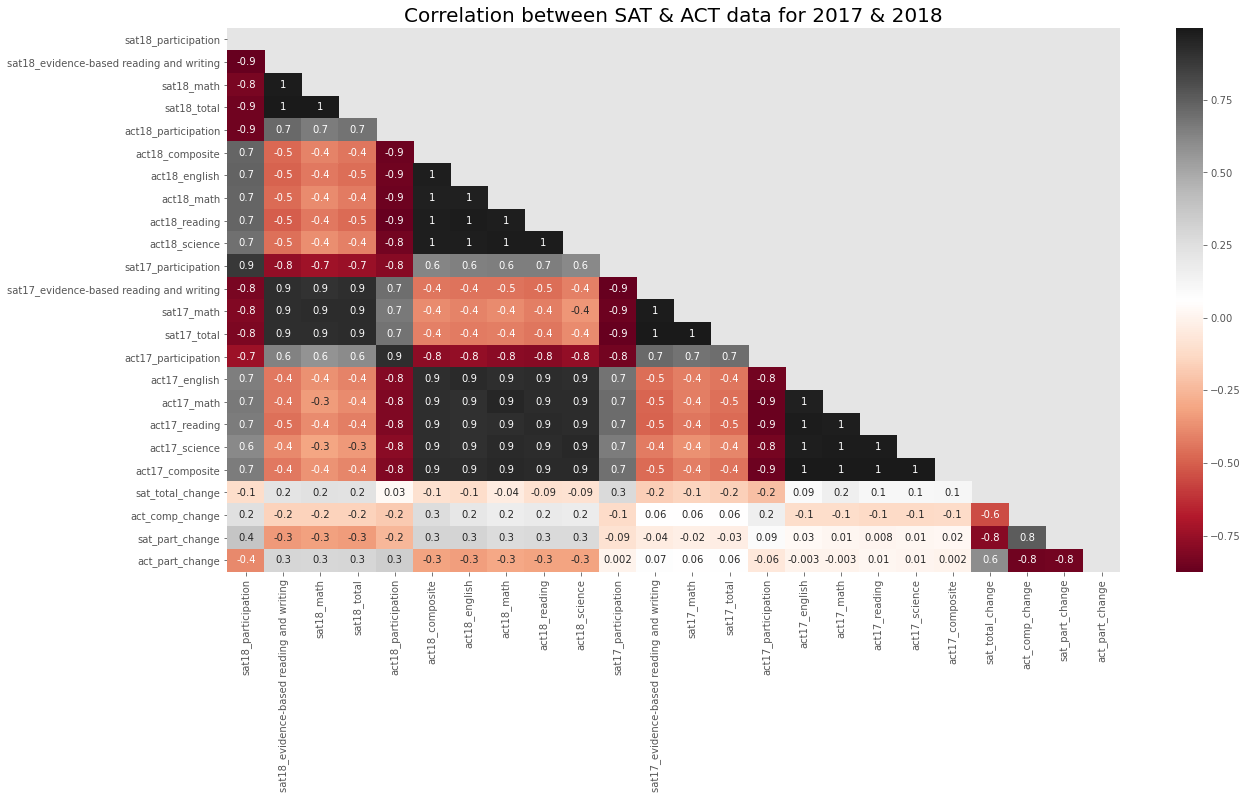

In [95]:
# set size of plot
plt.figure(figsize=(20, 10))

# add title to plot
plt.title("Correlation between SAT & ACT data for 2017 & 2018", fontsize = 20)
mask = (np.triu(np.ones_like(df_2017_2018.corr(), dtype=np.bool))) # masking half the heatmap to remove repeated information
sns.heatmap(df_2017_2018.corr(), annot=True, mask = mask, fmt='.1g', cmap='RdGy');# using 2 colours to differentiate

**Interpretation:**

Scores in 2017 is positively correlated to scores in 2018 for both SAT and ACT

Participation in 2017 is positively correlated to scored in 2018 for both SAT and ACT

Participation is negatively correlated with scores for both

SAT participation is negatively correlated with ACT participation
    

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [96]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12,10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i]) # Set titles for each subplot
        ax[i].set_xlabel(list_of_xlabels[i]) # Set xlabels for each subplot 
        ax[i].axvline(x= (dataframe[column].mean()), color='b', linestyle='dashed', linewidth=2, label = 'mean') #set mean line for each subplot
        ax[i].axvline(x= (dataframe[column].median()), color='r', linestyle='dashed', linewidth=2, label = 'median') #set median line for each subplot
        leg = ax[i].legend(); # setting legends for graph

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

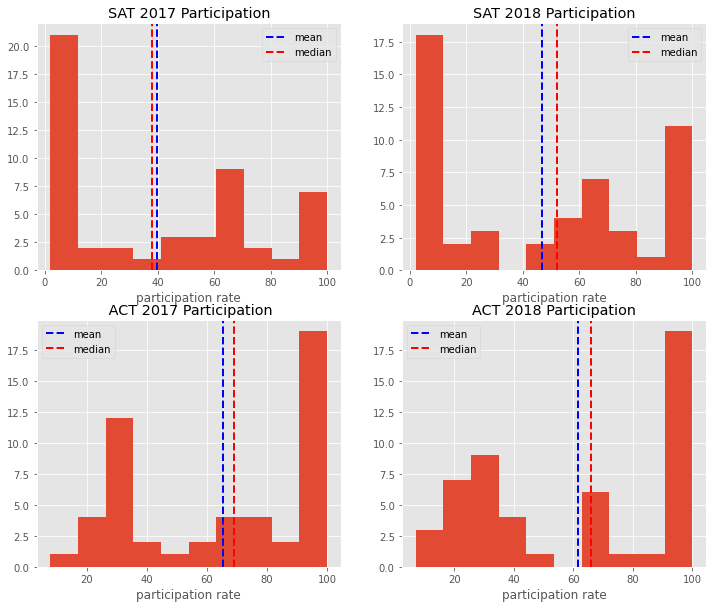

In [97]:
# Participation rates for SAT & ACT
subplot_histograms(df_2017_2018, 
                   list_of_columns=['sat17_participation', 'sat18_participation', 
                                    'act17_participation', 'act18_participation'],
                   list_of_titles=['SAT 2017 Participation', 'SAT 2018 Participation',
                                  ' ACT 2017 Participation', 'ACT 2018 Participation'],
                   list_of_xlabels=['participation rate', 'participation rate', 
                                    'participation rate', 'participation rate'])

**Interpretation:**

The Histograms are bimodal shape.

Participation rate for SAT and ACT between 2017 and 2018 remain similar. 

SAT has more states with participation rate at the lowest end, while ACT has more states with a higher participation rate.

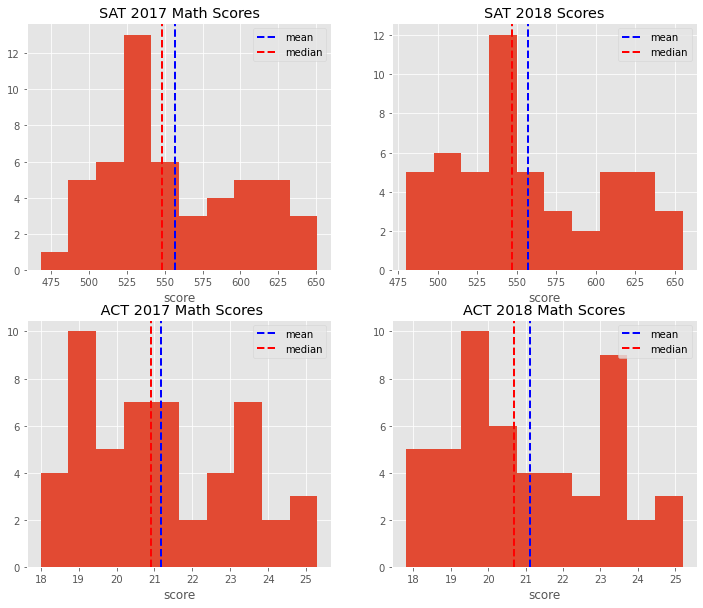

In [98]:
# Math scores for SAT & ACT
subplot_histograms(df_2017_2018, 
                   list_of_columns=['sat17_math', 'sat18_math', 
                                    'act17_math', 'act18_math'],
                   list_of_titles=['SAT 2017 Math Scores', 'SAT 2018 Scores',
                                  ' ACT 2017 Math Scores', 'ACT 2018 Math Scores'],
                   list_of_xlabels=['score', 'score', 
                                    'score', 'score'])

**Interpretation:**

the Histograms have a random distribution.

For SAT, more states have scores between 525 to 550.

For ACT, more states have a math score betwen 19 to 19.5.

The scores in ACT is more evenly distributed as compared to SAT scores.

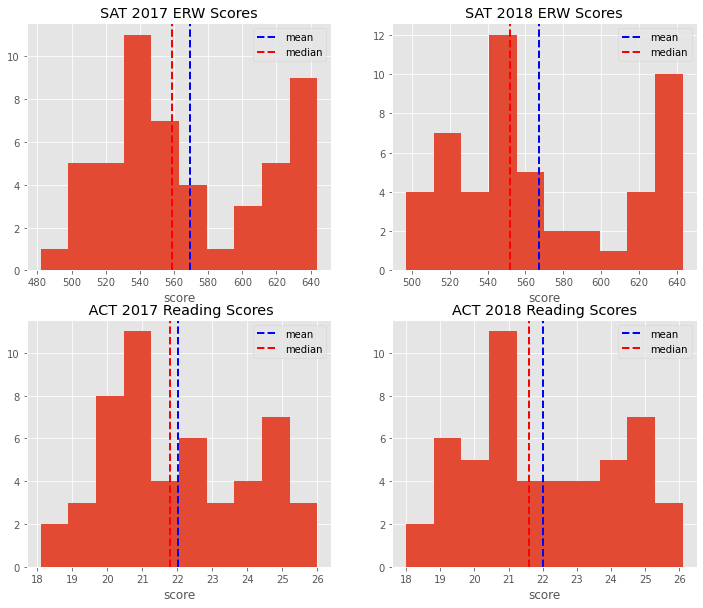

In [99]:
# Reading/verbal scores for SAT & ACT
subplot_histograms(df_2017_2018, 
                   list_of_columns=['sat17_evidence-based reading and writing', 
                                    'sat18_evidence-based reading and writing', 
                                    'act17_reading', 'act18_reading'],
                   list_of_titles=['SAT 2017 ERW Scores', 'SAT 2018 ERW Scores',
                                  ' ACT 2017 Reading Scores', 'ACT 2018 Reading Scores'],
                   list_of_xlabels=['score', 'score', 
                                    'score', 'score'])

**Interpretation:**

the Histograms have bimodal shapes.

The graphs shown to be similar despite having different scaling system for both SAT and ACT 

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [100]:
#code
def subplot_scatter(dataframe, xcolumns, ycolumns, titles, xlabels, ylabels):
    nrows = int(np.ceil(len(xcolumns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(14, 5*nrows)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(xcolumns):  # Gives us an index value to get into all our lists
        ax[i].scatter(dataframe[column], dataframe[ycolumns[i]]) #plot Scatter plot for each data
        ax[i].set_title(titles[i]) # Set Title for each plot
        ax[i].set_xlabel(xlabels[i])# Set x label for each plot
        ax[i].set_ylabel(ylabels[i])# Set y label for each plot
        ax[i].plot([0,1],[0,1], transform=ax[i].transAxes, color='blue', linestyle='dashed', linewidth=1, label = 'Diagonal') #set diagonal line to visually guide the perfect correlation
        leg = ax[i].legend(); # setting legends for graph

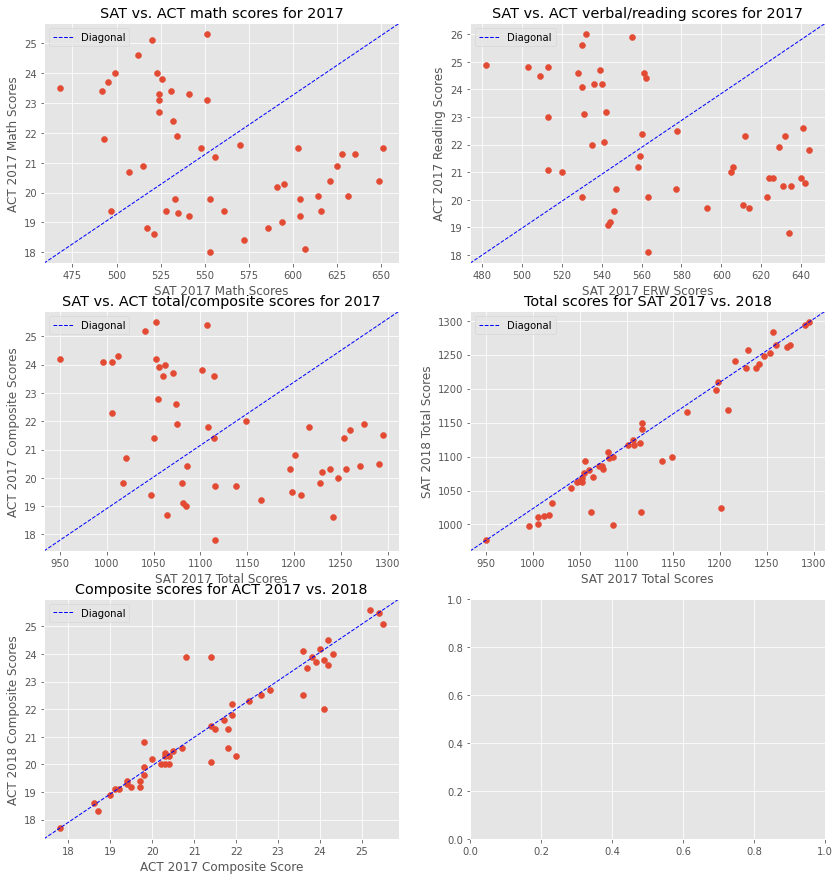

In [101]:
subplot_scatter(df_2017_2018, 
                xcolumns = ['sat17_math', 'sat17_evidence-based reading and writing',
                            'sat17_total', 'sat17_total', 'act17_composite'],
                ycolumns = ['act17_math', 'act17_reading', 'act17_composite', 'sat18_total', 'act18_composite'],
                titles = ['SAT vs. ACT math scores for 2017', 'SAT vs. ACT verbal/reading scores for 2017' ,
                          'SAT vs. ACT total/composite scores for 2017', 'Total scores for SAT 2017 vs. 2018', 
                          'Composite scores for ACT 2017 vs. 2018'],
                xlabels = ['SAT 2017 Math Scores', 'SAT 2017 ERW Scores', 'SAT 2017 Total Scores', 
                           'SAT 2017 Total Scores', 'ACT 2017 Composite Score'],
                ylabels = ['ACT 2017 Math Scores', 'ACT 2017 Reading Scores', 'ACT 2017 Composite Scores',
                          'SAT 2018 Total Scores', 'ACT 2018 Composite Scores'])

**Interpretation:**

There is no obvious relationship between SAT and ACT scores for math,reading and total scores in 2017. 

However, there is a general linear correlation between 2017 and 2018 for SAT Total Scores and ACT Composite scores. 


#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

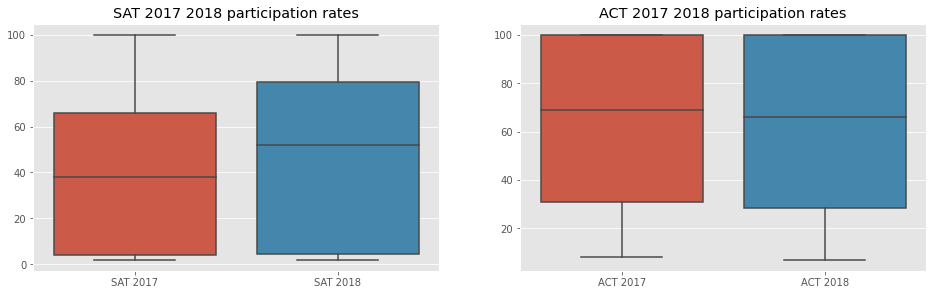

In [102]:
#Box plot for participation
plt.subplots(figsize=(16, 10))
plt.subplot(221)
plt.title('SAT 2017 2018 participation rates')
xticklabels = ['SAT 2017', 'SAT 2018']
sns.boxplot(data=df_2017_2018[['sat17_participation', 
                               'sat18_participation']]).set_xticklabels(xticklabels)

plt.subplot(222)
plt.title('ACT 2017 2018 participation rates')
xticklabels = ['ACT 2017', 'ACT 2018']
sns.boxplot(data=df_2017_2018[['act17_participation', 
                               'act18_participation']]).set_xticklabels(xticklabels);


**Interpretation:**
    
There seems to be an increase in some states for SAT participation in year 2018

While there is some states that has a drop in ACT participation in year 2017

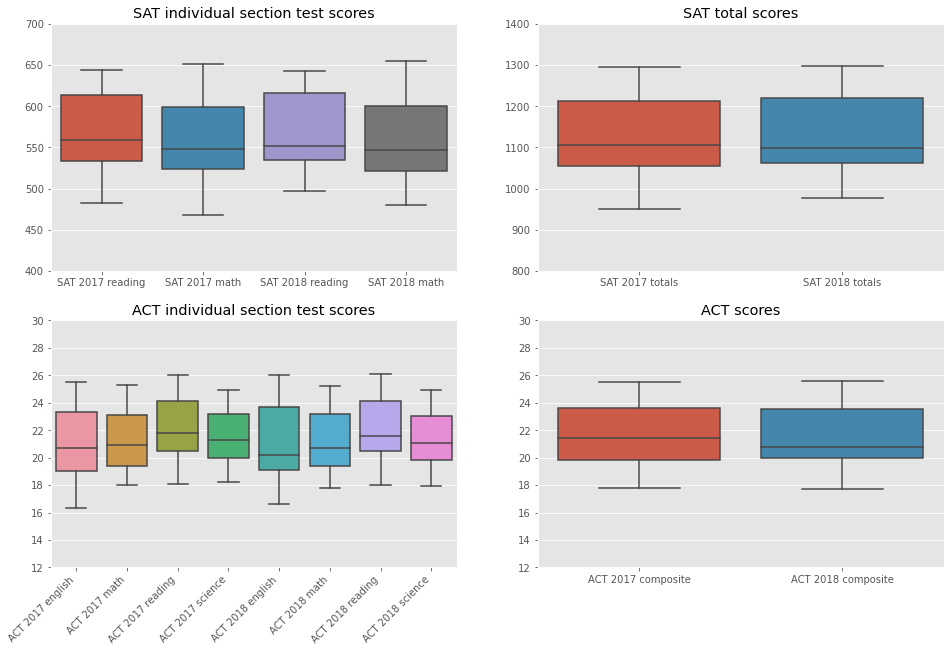

In [103]:
# Boxplot for scores, individual scores and total scores 
plt.subplots(figsize=(16, 10))
plt.subplot(221)
plt.ylim(400, 700)
plt.title('SAT individual section test scores')
xticklabels = ['SAT 2017 reading', 'SAT 2017 math', 'SAT 2018 reading', 'SAT 2018 math']
sns.boxplot(data=df_2017_2018[['sat17_evidence-based reading and writing', 'sat17_math', 
                               'sat18_evidence-based reading and writing', 'sat18_math']]).set_xticklabels(xticklabels)
plt.subplot(222)
plt.ylim(800, 1400)
plt.title('SAT total scores')
xticklabels = ['SAT 2017 totals', 'SAT 2018 totals']
sns.boxplot(data=df_2017_2018[['sat17_total', 'sat18_total']]).set_xticklabels(xticklabels)

plt.subplot(223)
plt.ylim(12, 30)
plt.title('ACT individual section test scores')
xticklabels = ['ACT 2017 english', 'ACT 2017 math', 
               'ACT 2017 reading', 'ACT 2017 science', 'ACT 2018 english', 
               'ACT 2018 math', 'ACT 2018 reading', 
               'ACT 2018 science',]
sns.boxplot(data=df_2017_2018[['act17_english', 'act17_math', 
                               'act17_reading', 'act17_science', 
                               'act18_english', 
                               'act18_math', 'act18_reading', 
                               'act18_science']]).set_xticklabels(xticklabels, rotation=45, ha='right')

plt.subplot(224)
plt.ylim(12, 30)
plt.title('ACT scores')
xticklabels = [ 'ACT 2017 composite', 
               'ACT 2018 composite']
sns.boxplot(data=df_2017_2018[['act17_composite', 
                               'act18_composite']]).set_xticklabels(xticklabels);

**Interpretation:**

The scores seems to be similar from year 2017 to year 2018.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

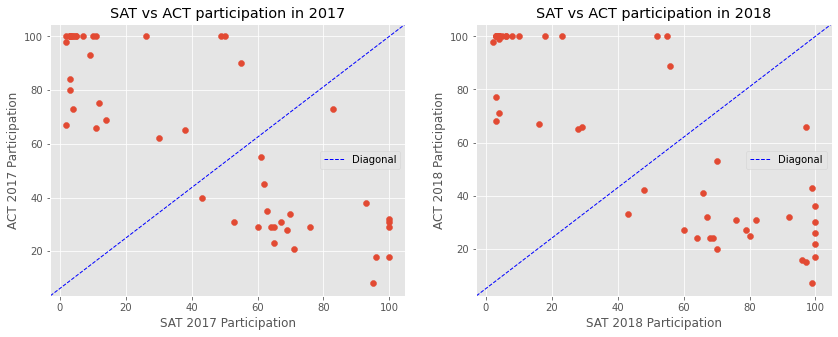

In [104]:
# Relationship between participation for SAT & ACT
subplot_scatter(df_2017_2018, 
                xcolumns = ['sat17_participation', 'sat18_participation'],
                ycolumns = ['act17_participation', 'act18_participation'],
                titles = ['SAT vs ACT participation in 2017', 'SAT vs ACT participation in 2018'],
                xlabels = ['SAT 2017 Participation', 'SAT 2018 Participation'],
                ylabels = ['ACT 2017 Participation', 'ACT 2018 Participation'])

**Interpretation:**

Most states either have High SAT participation or High ACT participation, but not both.

there is only 1 state per year to have more then 60% participation for both test

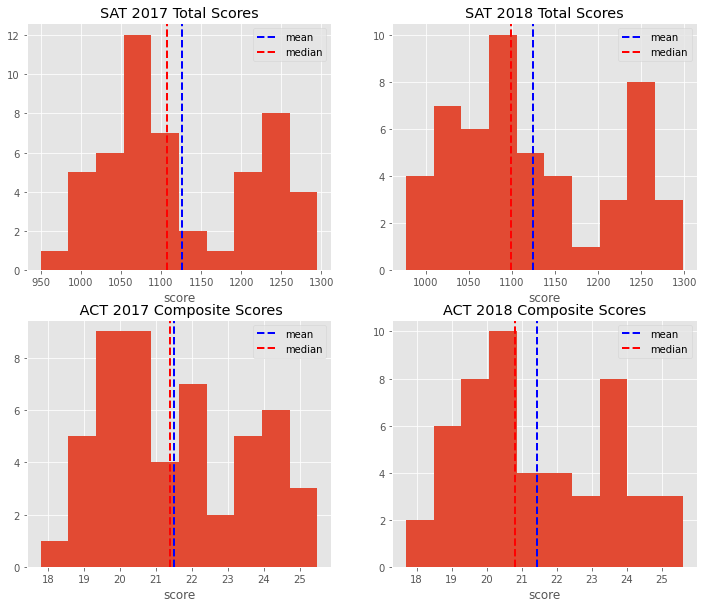

In [105]:
#histograms for total scores and composite scores
subplot_histograms(df_2017_2018, 
                   list_of_columns=['sat17_total', 'sat18_total',
                                    'act17_composite', 'act18_composite'],
                   list_of_titles=['SAT 2017 Total Scores', 'SAT 2018 Total Scores',
                                  ' ACT 2017 Composite Scores', 'ACT 2018 Composite Scores'],
                   list_of_xlabels=['score', 'score', 
                                    'score', 'score'])

In [106]:
#check relationship between all SAT scores
sat_scores_only = df_2017_2018.drop(['state', 'sat18_participation', 'act18_participation', 'act18_composite',
                                     'act18_reading', 'act18_science', 'sat17_participation', 'sat18_total',
                                     'act18_english','act18_math',
                                     'sat17_total','act17_participation', 'act17_english', 
                                     'act17_math', 'act17_reading','act17_science',
                                     'act17_composite', 'sat_total_change','act_comp_change', 
                                     'sat_part_change', 'act_part_change'], axis = 1)

sat_scores_only.head()

,sat18_evidence-based reading and writing,sat18_math,sat17_evidence-based reading and writing,sat17_math
0,595,571,593,572
1,562,544,547,533
2,577,572,563,553
3,592,576,614,594
4,540,536,531,524


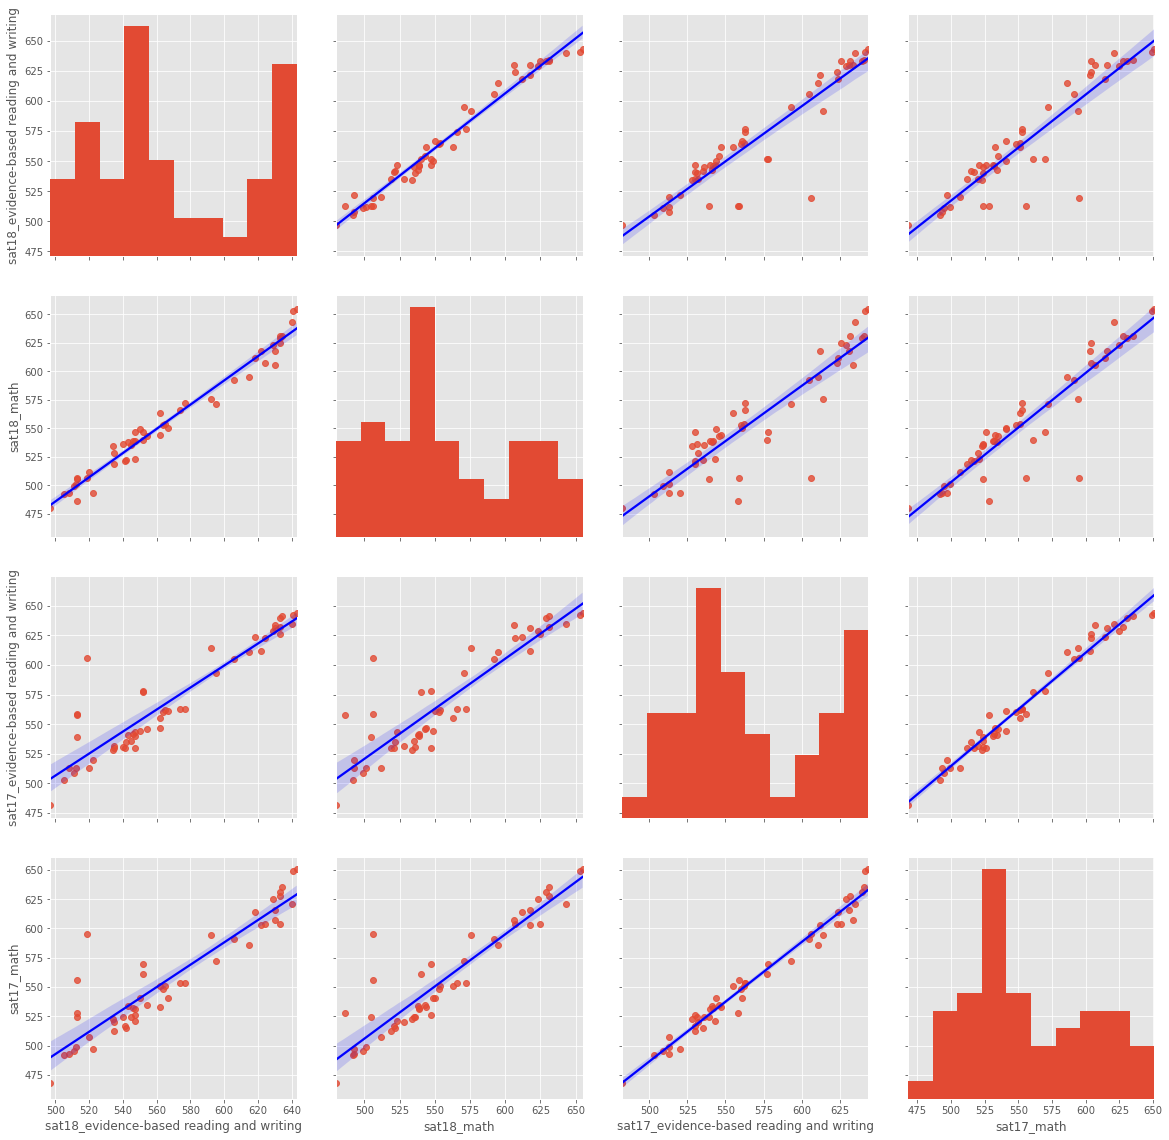

In [107]:
sns.pairplot(sat_scores_only, kind='reg', plot_kws={'line_kws':{'color': 'blue'}}, height = 4);
#blue line for linear regression of scatter plots

**Interpretation:**

For SAT test, most states that has high Math scores tend to have high ERW scores.

They also tend to have similar scores to the previous year.

In [108]:
# check relationship between all act scores
act_scores_only = df_2017_2018.drop(['state', 'sat18_participation',
                                     'sat18_total','sat18_evidence-based reading and writing', 'sat18_math',
                                     'act18_participation', 'act18_composite',
                                     'sat17_participation','sat17_total',
                                     'act17_participation','sat17_evidence-based reading and writing', 'sat17_math',
                                     'act17_composite', 'sat_total_change',
                                     'act_comp_change', 'sat_part_change', 'act_part_change'], axis = 1)

act_scores_only.head()

,act18_english,act18_math,act18_reading,act18_science,act17_english,act17_math,act17_reading,act17_science
0,18.9,18.3,19.6,19.0,18.9,18.4,19.7,19.4
1,19.8,20.6,21.6,20.7,18.7,19.8,20.4,19.9
2,18.2,19.4,19.5,19.2,18.6,19.8,20.1,19.8
3,19.1,18.9,19.7,19.4,18.9,19.0,19.7,19.5
4,22.5,22.5,23.0,22.1,22.5,22.7,23.1,22.2


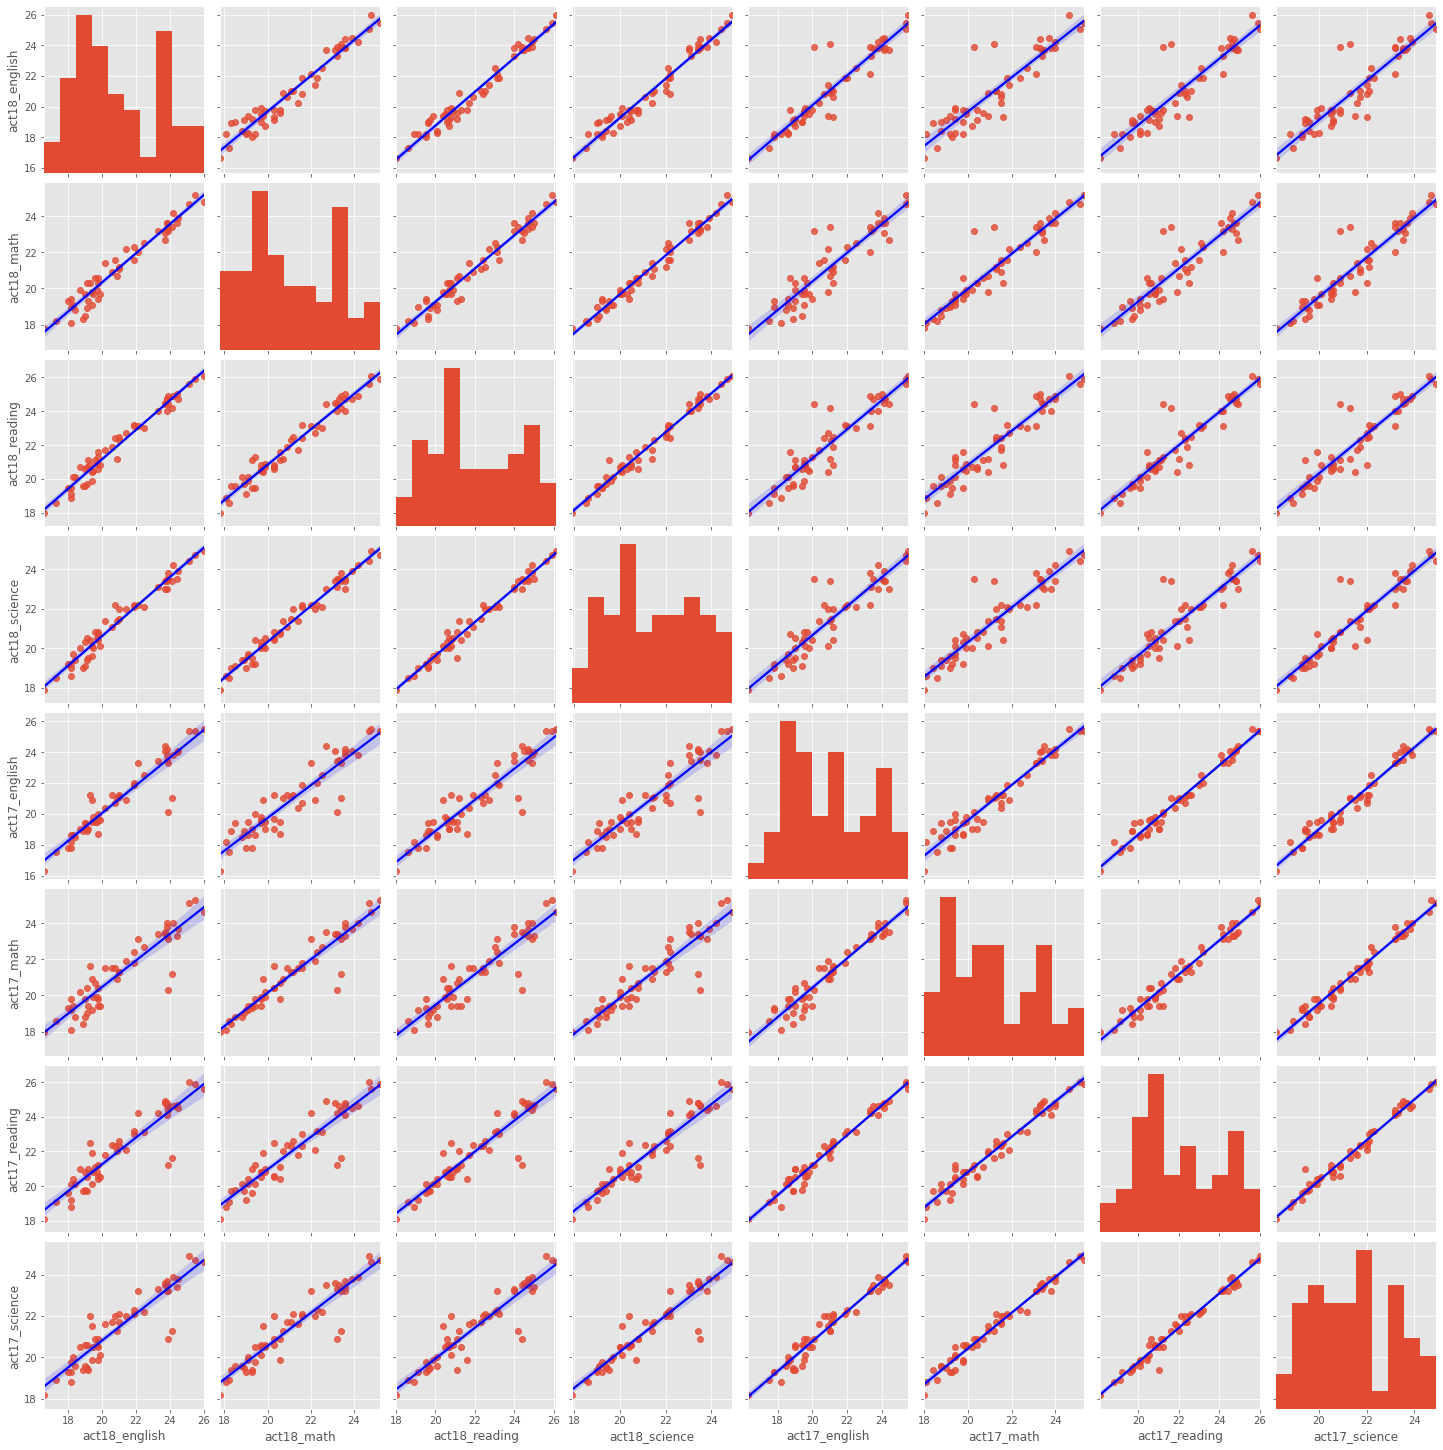

In [109]:
sns.pairplot(act_scores_only, kind='reg', plot_kws={'line_kws':{'color': 'blue'}});
#blue line for linear regression of scatter plots

**Interpretation:**

For ACT test, the scores for subjects are closely related to each other.

Those that score high in 1 subject tend to score better at other subjects too.

They tend to have similar scores as compared to previous year


#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

[Links to Tableau Public link for the maps](https://public.tableau.com/views/DSI1_15963685813510/SAT2018?:language=en-GB&:display_count=y&publish=yes&:origin=viz_share_link)

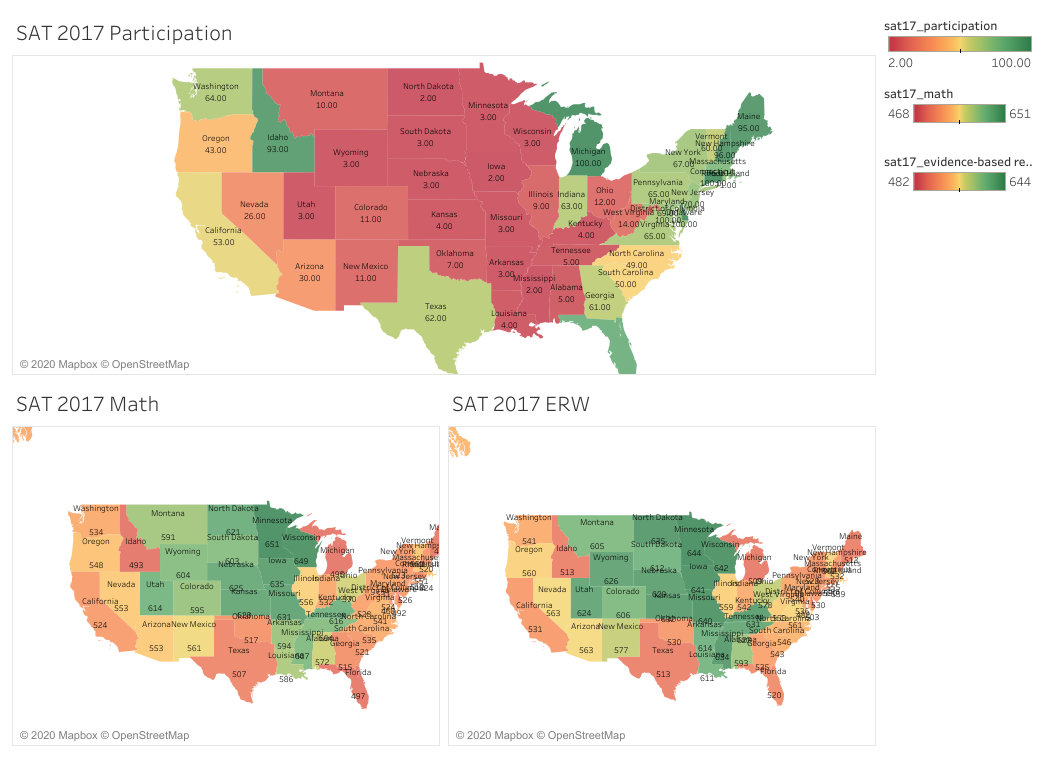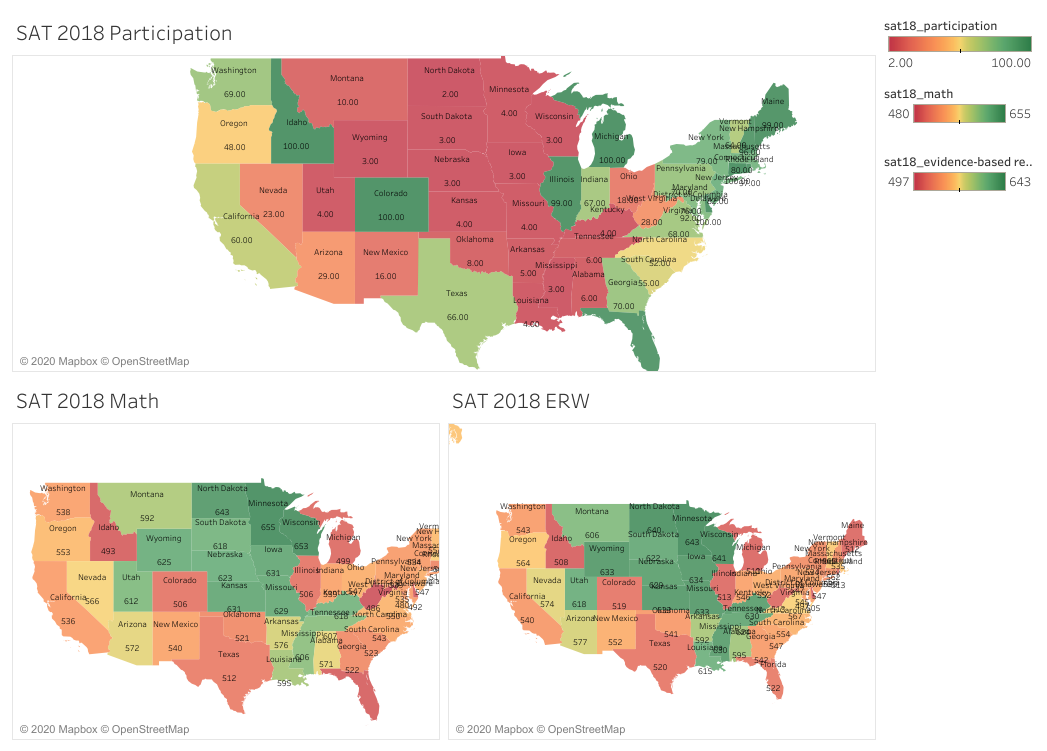

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [110]:
round(df_2017_2018.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
sat18_participation,51.0,46.63,38.01,2.0,4.50,52.0,79.50,100.0
sat18_evidence-based reading and writing,51.0,567.29,45.32,497.0,535.00,552.0,616.50,643.0
sat18_math,51.0,557.25,48.89,480.0,521.50,547.0,600.50,655.0
sat18_total,51.0,1124.67,93.87,977.0,1062.50,1099.0,1220.00,1298.0
act18_participation,51.0,61.65,34.08,7.0,28.50,66.0,100.00,100.0
act18_composite,51.0,21.43,2.08,17.7,19.95,20.8,23.55,25.6
act18_english,51.0,20.99,2.45,16.6,19.10,20.2,23.70,26.0
act18_math,51.0,21.13,2.04,17.8,19.40,20.7,23.15,25.2
act18_reading,51.0,22.02,2.17,18.0,20.45,21.6,24.10,26.1
act18_science,51.0,21.35,1.87,17.9,19.85,21.1,23.05,24.9


In [111]:
df_2017_2018.skew() #checking for skewness of data

sat18_participation                         0.108659
sat18_evidence-based reading and writing    0.358866
sat18_math                                  0.423711
sat18_total                                 0.389086
act18_participation                        -0.021916
act18_composite                             0.342158
act18_english                               0.371507
act18_math                                  0.269548
act18_reading                               0.201361
act18_science                               0.172383
sat17_participation                         0.346450
sat17_evidence-based reading and writing    0.272693
sat17_math                                  0.365040
sat17_total                                 0.310903
act17_participation                        -0.197989
act17_english                               0.352660
act17_math                                  0.332683
act17_reading                               0.269366
act17_science                               0.

Answer:

* sat17_participation is positively skewed, with the distribution leaning towards the lower end of the graph. The Standard deviation of **35.28** is high relative to the mean of **39.80**, meaning the rate of participation varies widely between states in year 2017 for SAT.

* sat17_evidence-based reading and writing, sat17_math and sat17_total are positively skewed, with distribution leaning towards the ends of the graph.

* act17_participation is negatively skewed, with distribution leaning towards the lower end of the graph.The Standard deviation of **32.14** is high relative to the mean of **65.25**, meaning the rate of participation varies widely between states in year 2017 for ACT.

* act17_composite, act17_english, act17_math, act17_reading and act17_science are all positively skewed, with distribution towards the lower end of the graph. act17_english has the highest variance in the scores.

* sat18_participation is positively skewed, with the distribution leaning towards the lower end of the graph. The Standard deviation of **52.00** is slightly higher then the mean of **46.63**, suggesting a slight difference in the rate of participation between states in year 2017 for SAT.

* sat18_participation is also less positively skewed in comparison to its previous year record, suggesting a great number of states have increased in participation.

* sat18_evidence-based reading and writing, sat18_math and sat18_total are positively skewed, with distribution leaning towards the ends of the graph.

* act18_participation is negatively skewed, with the distribution leaning towards the lower end of the graph. The Standard deviation of **34.08** is high relative to the mean of **61.65**, meaning the rate of participation varies widely between states in year 2017 for ACT.

* act18_participation is also less negatively skewed in comparison to its previous year record, suggesting a great number of states are dropping in participation.

* act18_composite, act18_english, act18_math, act18_reading and act18_science are all positively skewed, with distribution towards the lower end of the graph. act18_english has the highest variance in the scores.



#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

Answer: 

The data is not normally distributed.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

* Math scores are positively skewed, and is very close to be normally distributed.


* Reading scores are not normally distributed, as we should be able to observe small tails in normal distribution graphs, but this is not the case of Reading scores charts. We can instead observe the mode of the distribution to be nearer at the end of the graph instead.


* Participation rates are not normally distributed at all. States that have achieved 100% participation rate tend to keep it the same, thus there is nothing to suggest it will be normally distributed.



#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

no.

The sample in this case comprises the whole population of high school students in the year, thus any statistics derived from the data can be said to apply to the population.

However, this data does not include students that are taking the test which is not part of public schools in the states

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

Answer:

No. 

As different states have different participation rate, it is difficult to compare who actually took the test that can be represented for the whole population. They also have different scoring system.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [112]:
#Null hypothesis: SAT participation rate = ACT participation rate
np.var(df_2017_2018['sat18_participation'])

1416.7435601691657

In [113]:
np.var(df_2017_2018['act18_participation'])

1138.7381776239906

In [114]:
#Ttest of SAT and ACT in 2018
stats.ttest_ind(df_2017_2018['sat18_participation'],df_2017_2018['act18_participation'], equal_var = False)

Ttest_indResult(statistic=-2.1009088225582375, pvalue=0.03819347926404722)

In [115]:
np.var(df_2017_2018['sat17_participation'])

1220.0399846213

In [116]:
np.var(df_2017_2018['act17_participation'])

1012.7781622452906

In [117]:
#Ttest of SAT and ACT in 2017
stats.ttest_ind(df_2017_2018['act17_participation'],df_2017_2018['sat17_participation'], equal_var = False)

Ttest_indResult(statistic=3.808577890817054, pvalue=0.00024238408285306908)

**Interpretation:**

The participation rate between SAT and ACT is siginificantly different across the states in both years.(P-value< 0.05)

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Based on observations, i have identified the following states to be interesting:

* Illinois (largest increase in the number of participation for SAT test)

* Colorado (2nd largest increase in number of SAT participation, and largest decrease in ACT test participation)

* Michigan, Delaware and Connecticut have the 100%  SAT participation for both years

* Illinois and Colorado also see the most score changes in SAT and ACT(significant drop in SAT and very slight improvement in ACT

Further research has shown that the spike in Illinois and Colorado SAT participation rate was due to the states setting SAT as a mandatory test. It is also mentioned the change is a cost saving effort of the states.

* Colorado switch to SAT will provide some fund relief for students taking the test

  * [Colorado's Switch from ACT to SAT](https://www.coloradokids.org/colorado-switches-from-act-to-sat-for-high-school-college-entrance-assessments/)
  
* Illinois awarded SAT with a 3 year contract for its proposal that is \$1.37mil less then ACT

  * [Illinois switching from ACT, will give students SAT instead](https://www.bnd.com/news/local/article50939170.html)

* Illinois, Colorado and Michigan have all been proposed a lower bid price for SAT as compared to ACT
  
  * [Bid price reference](https://thecriticalreader.com/is-the-college-board-playing-a-rigged-game/)

**Relevant Links:**

* [Which States Require the SAT or ACT? Complete List](https://www.edweek.org/ew/section/multimedia/states-require-students-take-sat-or-act.html)

From the above links, states that were mention are all in partnership with the College Board(SAT School Day), which made it compulsory to take the SAT.

It is also good to note that the fees of SAT test is billed to the states, offering a "free test" solution for lower income students. It also come with Free study materials.

In [118]:
# draw out states that require to take SAT due to SAT School day by College board
ssd_states = ['Colorado', 'Connecticut', 'Delaware', 'District of Columbia','Idaho', 
              'Illinois','Maine', 'Michigan', 'New Hampshire', 'Oklahoma', 'Ohio', 'Rhode Island', 
              'South Carolina', 'Tennessee', 'West Virginia']

required_sat = df_2017_2018[df_2017_2018['state'].isin(ssd_states)]

In [119]:
#check data for states requiring SAT test
round(required_sat[['state', 'sat17_participation', 
                    'sat18_participation', 
                    'act17_participation', 'act18_participation']].head())

,state,sat17_participation,sat18_participation,act17_participation,act18_participation
5,Colorado,11.0,100.0,100.0,30.0
6,Connecticut,100.0,100.0,31.0,26.0
7,Delaware,100.0,100.0,18.0,17.0
8,District of Columbia,100.0,92.0,32.0,32.0
12,Idaho,93.0,100.0,38.0,36.0


In [120]:
#check data for states requiring SAT test
round(required_sat[['state', 'sat17_participation', 'sat18_participation', 'sat_part_change', 
                    'act17_participation', 'act18_participation', 'act_part_change' ]].describe())

,sat17_participation,sat18_participation,sat_part_change,act17_participation,act18_participation,act_part_change
count,15.0,15.0,15.0,15.0,15.0,15.0
mean,58.0,73.0,16.0,55.0,47.0,-8.0
std,43.0,38.0,31.0,36.0,36.0,23.0
min,5.0,6.0,-8.0,8.0,7.0,-70.0
25%,12.0,42.0,0.0,25.0,20.0,-6.0
50%,71.0,97.0,4.0,38.0,32.0,-2.0
75%,98.0,100.0,10.0,96.0,82.0,0.0
max,100.0,100.0,90.0,100.0,100.0,25.0


In [121]:
#check data for states not requiring SAT test
not_required_sat = df_2017_2018[~df_2017_2018['state'].isin(ssd_states)]
round(not_required_sat[['state', 'sat17_participation', 
                    'sat18_participation', 
                    'act17_participation', 'act18_participation']].head())

,state,sat17_participation,sat18_participation,act17_participation,act18_participation
0,Alabama,5.0,6.0,100.0,100.0
1,Alaska,38.0,43.0,65.0,33.0
2,Arizona,30.0,29.0,62.0,66.0
3,Arkansas,3.0,5.0,100.0,100.0
4,California,53.0,60.0,31.0,27.0


In [122]:
#check data for states not requiring SAT test
round(not_required_sat[['state', 'sat17_participation', 'sat18_participation', 'sat_part_change', 
                    'act17_participation', 'act18_participation', 'act_part_change' ]].describe())

,sat17_participation,sat18_participation,sat_part_change,act17_participation,act18_participation,act_part_change
count,36.0,36.0,36.0,36.0,36.0,36.0
mean,32.0,36.0,3.0,69.0,68.0,-2.0
std,29.0,32.0,4.0,30.0,32.0,6.0
min,2.0,2.0,-3.0,23.0,20.0,-32.0
25%,3.0,4.0,0.0,35.0,32.0,-3.0
50%,28.0,26.0,2.0,73.0,70.0,0.0
75%,62.0,67.0,5.0,100.0,100.0,0.0
max,83.0,97.0,14.0,100.0,100.0,16.0


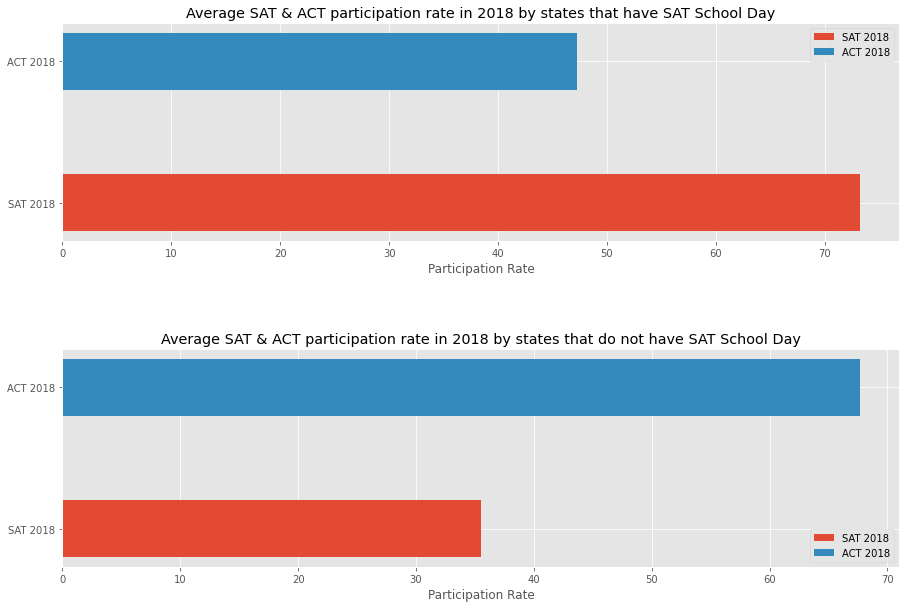

In [123]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
plt.subplots_adjust(hspace = 0.5)


ax1.barh('SAT 2018', required_sat['sat18_participation'].mean(), 
         align='center', height = 0.4, label ='SAT 2018') #set horizontal bar plot
ax1.barh('ACT 2018', required_sat['act18_participation'].mean(), 
         align='center', height = -0.4, label ='ACT 2018') #set horizontal bar plot
ax1.set_xlabel('Participation Rate') #set x label
ax1.set_title('Average SAT & ACT participation rate in 2018 by states that have SAT School Day') #set Title of plot
leg = ax1.legend();

ax2.barh('SAT 2018', not_required_sat['sat18_participation'].mean(), 
         align='center', height = 0.4, label ='SAT 2018') #set horizontal bar plot
ax2.barh('ACT 2018', not_required_sat['act18_participation'].mean(), 
         align='center', height = -0.4, label ='ACT 2018') #set horizontal bar plot
ax2.set_xlabel('Participation Rate') #set x label
ax2.set_title('Average SAT & ACT participation rate in 2018 by states that do not have SAT School Day') #set Title of plot
leg = ax2.legend();

**Interpretation:**
The program seems to have a positive impact for SAT participation. States that is part of the program has an average of 73% whereas other states has an average of 36% in 2018.

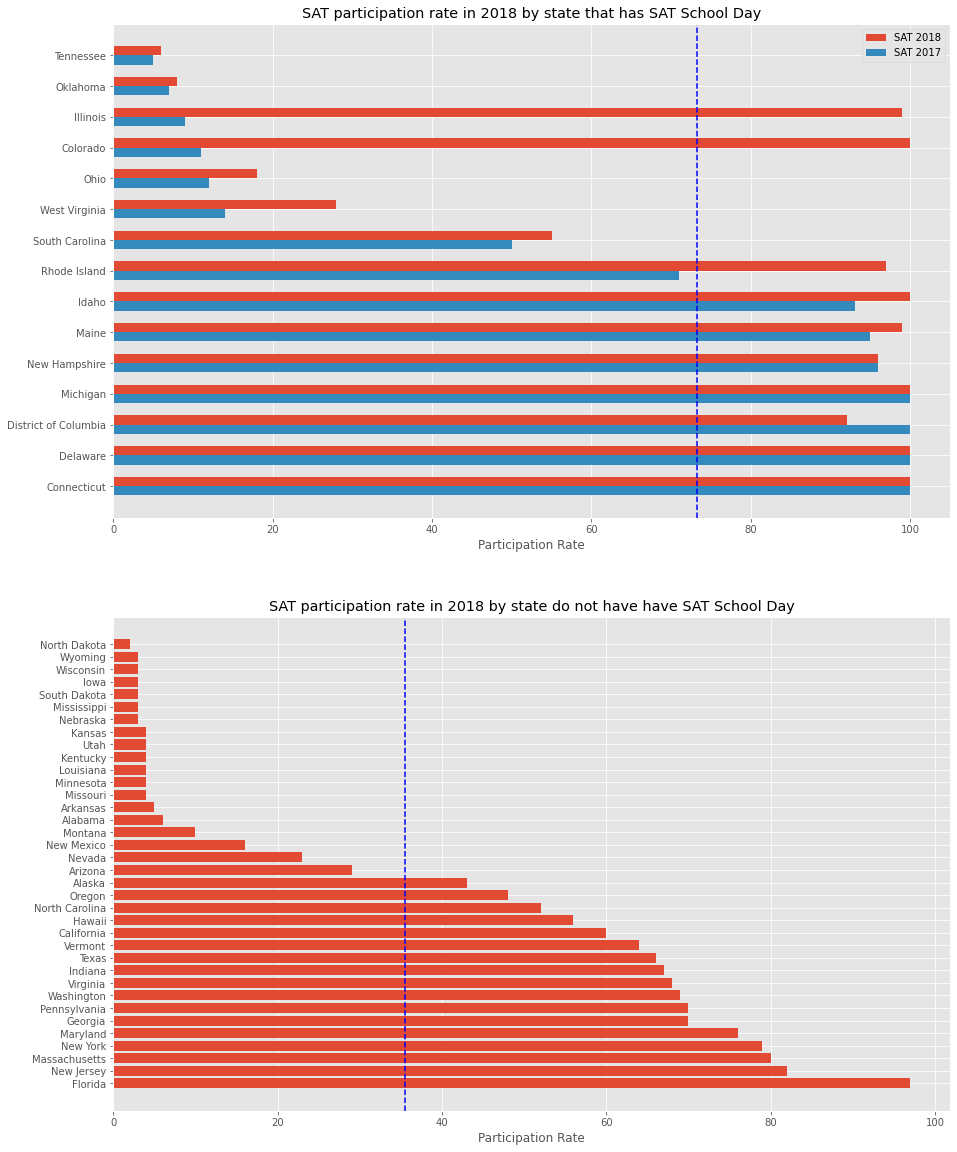

In [124]:
#checking participation of states with and without SAT school Day
required_sat_sorted_2018 = required_sat.sort_values('sat17_participation', ascending = False) #creating descending order
not_required_sat_sorted_2018 = not_required_sat.sort_values('sat18_participation', ascending = False) #creating descending order

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 20))
plt.subplots_adjust()

#code for States with SAT School Day
ax1.barh(required_sat_sorted_2018['state'], required_sat_sorted_2018['sat18_participation'], 
         align='edge', height = 0.3, label = 'SAT 2018') #set horizontal bar plot
ax1.barh(required_sat_sorted_2018['state'], required_sat_sorted_2018['sat17_participation'], 
         align='edge', height = -0.3, label = 'SAT 2017') #set horizontal bar plot
ax1.set_yticks(required_sat_sorted_2018['state']) #set y ticks
ax1.set_yticklabels(required_sat_sorted_2018['state']) #set y ticks label
ax1.axvline(np.mean(required_sat_sorted_2018['sat18_participation']), color='b', linestyle='--') #set mean line
ax1.set_xlabel('Participation Rate') #set x label
ax1.set_title('SAT participation rate in 2018 by state that has SAT School Day') #set Title of plot
leg = ax1.legend()

#code for States without SAT School Day
ax2.barh(not_required_sat_sorted_2018['state'], not_required_sat_sorted_2018['sat18_participation'], align = 'center')  #set horizontal bar plot
ax2.set_yticks(not_required_sat_sorted_2018['state']) #set y ticks
ax2.set_yticklabels(not_required_sat_sorted_2018['state'])#set y ticks label
ax2.axvline(np.mean(not_required_sat_sorted_2018['sat18_participation']), color='b', linestyle='--')#blue line for the mean
ax2.set_xlabel('Participation Rate')#set x label
ax2.set_title('SAT participation rate in 2018 by state do not have have SAT School Day'); #set Title of plot

**Intepretation:**

Students in the following district is not restricted to taking only SAT, as they have a choice to either take or not.

* Ohio: To graduate high school in Ohio, students must meet threshold scores on the SAT or ACT.
* Oklahoma: Students in Oklahoma must take either the SAT or ACT, with the choice of test being determined by each individual school district.
* South Carolina: Students in South Carolina must take either the SAT or ACT. Which test you take will be determined by your school district.
* Tennessee: Students must take either the SAT or ACT.
* West Virginia: All juniors must take the SAT unless taking the West Virginia Alternative Summer Assessment.
* These states do not require the students to take SAT or ACT to graduate: Alaska, Arkansas, Arizona, Florida, Maryland, Minnesota, Mississippi, New Mexico, New York, Oregon, Texas, and Washington.

Abstract from article [Which States Require the SAT? Complete List](https://blog.prepscholar.com/which-states-require-the-sat)

In [125]:
#Looking for states with SAT School Day above mean average
ssd_above = required_sat[required_sat['sat18_participation'] > 73]
ssd_above[['state', 'sat17_participation', 'sat18_participation', 'sat_part_change',
           'act17_participation', 'act18_participation', 'act_part_change']]

,state,sat17_participation,sat18_participation,sat_part_change,act17_participation,act18_participation,act_part_change
5,Colorado,11.0,100.0,89.0,100.0,30.0,-70.0
6,Connecticut,100.0,100.0,0.0,31.0,26.0,-5.0
7,Delaware,100.0,100.0,0.0,18.0,17.0,-1.0
8,District of Columbia,100.0,92.0,-8.0,32.0,32.0,0.0
12,Idaho,93.0,100.0,7.0,38.0,36.0,-2.0
13,Illinois,9.0,99.0,90.0,93.0,43.0,-50.0
19,Maine,95.0,99.0,4.0,8.0,7.0,-1.0
22,Michigan,100.0,100.0,0.0,29.0,22.0,-7.0
29,New Hampshire,96.0,96.0,0.0,18.0,16.0,-2.0
39,Rhode Island,71.0,97.0,26.0,21.0,15.0,-6.0


**Interpretation:**

* States that set SAT as a requirement to graduate has a higher participation rate as compared to their ACT participation

In [126]:
# states that do not need test to graduate
no_test_to_grad = ['Alaska', 'Arkansas', 'Arizona', 'Florida',
              'Maryland', 'Minnesota', 'Mississippi', 
              'New Mexico', 'New York', 'Oregon', 'Texas', 'Washington']

no_test_states = df_2017_2018[df_2017_2018['state'].isin(no_test_to_grad)]
no_test_states.groupby('state')[['sat17_participation', 
                                 'sat18_participation', 'act17_participation', 'act18_participation']].mean()

,sat17_participation,sat18_participation,act17_participation,act18_participation
state,,,,
Alaska,38.0,43.0,65.0,33.0
Arizona,30.0,29.0,62.0,66.0
Arkansas,3.0,5.0,100.0,100.0
Florida,83.0,97.0,73.0,66.0
Maryland,69.0,76.0,28.0,31.0
Minnesota,3.0,4.0,100.0,99.0
Mississippi,2.0,3.0,100.0,100.0
New Mexico,11.0,16.0,66.0,67.0
New York,67.0,79.0,31.0,27.0


**Interpretation:**

* States that does not require their students to undetake SAT or ACT to graduate mostly see a balance of participation rate between the 2 test.

* Arkansas, Minnesota, Mississippi and New Mexico has the very low SAT participation rate compared to their high ACT participation in both years.
  * Arkansas and Minnesota offered both test 
  * [Which States Require the ACT? Full List and Advice](https://blog.prepscholar.com/which-states-require-the-act-full-list-and-advice)

Student debts by states

* States that has the most student debts are New Hampshire, Pennsylvania, Connecticut, Delaware and Minnesota.
* [Student Debts across states](https://www.forbes.com/sites/zackfriedman/2018/08/29/student-loans-by-state/#194df35c6d7d)


In [127]:
most_sdebts_states = ['New Hampshire', 'Pennsylvania', 'Connecticut', 'Delaware', 'Minnesota']


most_sdebts = df_2017_2018[df_2017_2018['state'].isin(most_sdebts_states)]

In [128]:
round(most_sdebts[['state', 'sat17_participation', 
                    'sat18_participation', 
                    'act17_participation', 'act18_participation']])

,state,sat17_participation,sat18_participation,act17_participation,act18_participation
6,Connecticut,100.0,100.0,31.0,26.0
7,Delaware,100.0,100.0,18.0,17.0
23,Minnesota,3.0,4.0,100.0,99.0
29,New Hampshire,96.0,96.0,18.0,16.0
38,Pennsylvania,65.0,70.0,23.0,20.0


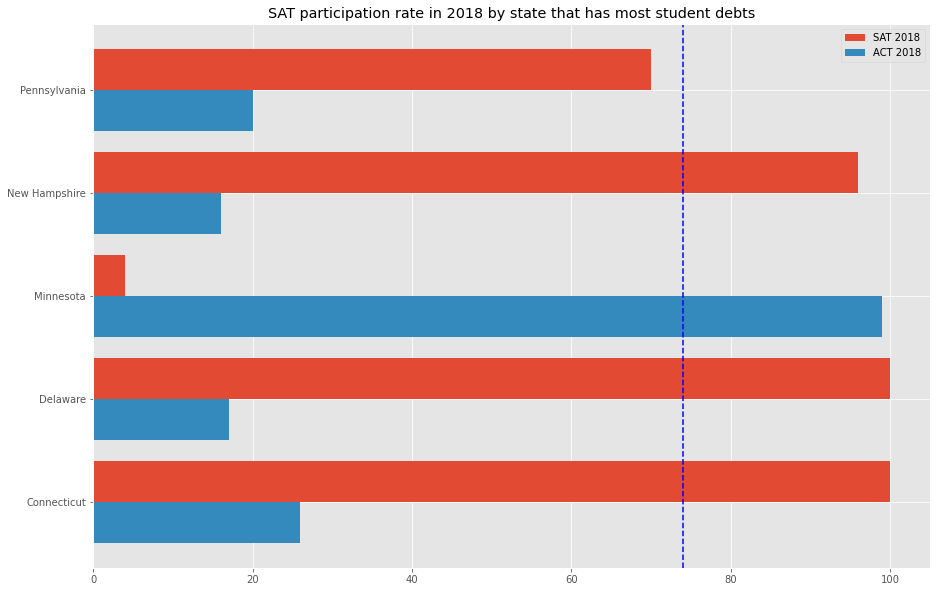

In [129]:
#checking participation of states with high student debts
# for SAT test participation
plt.figure(figsize=(15,10))
plt.barh(most_sdebts['state'], most_sdebts['sat18_participation'], 
         align='edge', height = 0.4, label ='SAT 2018') #set horizontal bar plot
plt.barh(most_sdebts['state'], most_sdebts['act18_participation'], 
         align='edge', height = -0.4, label ='ACT 2018') #set horizontal bar plot
plt.axvline(np.mean(most_sdebts['sat18_participation']), color='b', linestyle='--') #set mean line
plt.title('SAT participation rate in 2018 by state that has most student debts') #set Title of plot
plt.legend(loc='best');


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

## Conclusions:

**SAT School Day**

The program seems to have a positive impact for SAT participation. States that is part of the program has an average of 73% whereas other states has an average of 36% in 2018.


## Findings:

**Targets for improvement**

There are a few states that we can target to further improve the participation rate of SAT, through additional funding. There is also district that do not require ACT, therefore they may be more willing to opt for SAT School Day Program. 
* District of Columbia: largest decrease of participation rate from 2017 - 2018, 8% drop


* States already in SAT School Day with low 2018 participation: Oklahoma, Ohio, South Carolina, Tennessee, West Virginia.

  * It is interesting to note that despite having the option to choose between SAT and ACT, the students in Oklahoma, Ohio, South Carolina and Tennessee has a higher ACT participation as compared to SAT participation. (West Virginia has an West Virginia Alternative Summer Assessment that students can opt for)


* Arkansas and Minnesota has the very low SAT participation rate compared to their high ACT participation in both years despite being offered both test and is not necessary to graduate. We can consider approaching these states to be part of SAT School Day to see if we can increase the participation rate of SAT.

* States with high student debts tend to have higher sat participation rate, as SAT school day offer free SAT test.


## Recommendations:

Ideally I would look for states that has a higher student debt and has low SAT participation(provided that ACT is not mandatory in the said state)

My recommended state will be Minnesota, the reason being:
* Not compulsory to take the ACT, but have to take either test to graduate
* High student debt, would be more willing to take part in SAT school day
* Has low SAT participation, therefore higher chance of participation growth
